# PS5
```
Fiona Fan
```
## 1a). 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from pylab import rcParams
from sklearn.model_selection import LeaveOneOut, KFold
import statsmodels.api as sm
from scipy.interpolate import LSQUnivariateSpline
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
df = pd.read_csv('data/strongdrink.txt')
# df['const']=1
X = df[['alco', 'malic', 'tot_phen', 'color_int']]
y = df[['cultivar']]
y.cultivar.value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

In [24]:

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.25,
       random_state=20)
MultLogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
MultLogReg.fit(X_train, y_train)
y_pred_1 = MultLogReg.predict(X_test)

print(classification_report(y_test, y_pred_1))
# print(classification_report(y_test, y_pred))
print (f'The error rate for j=1 is {1-0.87} and the error rate for j=2 is 1.')
print(f'Validation set MSE = {mean_squared_error(y_test, y_pred_1)}')

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

The error rate for j=1 is 0.13 and the error rate for j=2 is 1.
Validation set MSE = 0.045454545454545456


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print(f'The betas for j=1 are')
print(f'beta0={MultLogReg.intercept_[0]}')
[print(f'beta{i+1}={coef}') for i, coef in enumerate((MultLogReg.coef_[0]))]
print('')
print(f'The betas for j=2 are')
print(f'beta0={MultLogReg.intercept_[1]}')
[print(f'beta{i+1}={coef}') for i, coef in enumerate((MultLogReg.coef_[1]))]


The betas for j=1 are
beta0=-24.011261619895386
beta1=1.7004258713999434
beta2=-0.2656078076835968
beta3=1.2238948659931201
beta4=0.02275133889272314

The betas for j=2 are
beta0=22.802087239655783
beta1=-1.4680163708712808
beta2=-0.33305185036975116
beta3=0.6640075077761813
beta4=-0.9227104250819742


[None, None, None, None]

Both cases of j=2 and j=3 have perfect precision of 1, while j=3 has better recall score. j=2 has 71 (most) observations while j=3 has 46 (fewest) observations. The most accurately predicted category is not the one with the most observations.

# 1 b).

In [47]:
Xvals = X.values
yvals = y.values
loo = LeaveOneOut()
loo.get_n_splits(Xvals)
N_loo = Xvals.shape[0]
MSE = pd.DataFrame({'index': np.zeros(N_loo), 
                    'error': np.zeros(N_loo), 
                    'y_pred': np.zeros(N_loo),
                    'y_test': np.zeros(N_loo)})
for train_index, test_index in loo.split(Xvals):
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE['index'][test_index] = test_index
    MSE['error'][test_index] = (((y_test - y_pred) ** 2) != 0).astype(int)
    MSE['y_pred'][test_index] = y_pred
    MSE['y_test'][test_index] = y_test

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
error_1 = MSE[MSE['y_pred'] == 1]['error'].mean()
error_2 = MSE[MSE['y_pred'] == 2]['error'].mean()
error_3 = MSE[MSE['y_pred'] == 3]['error'].mean()
General_MSE = MSE['error'].mean()
print(classification_report(MSE['y_test'], MSE['y_pred'], digits=3))
print('The error rate for class 1 is', error_1, ', std is', MSE[MSE['y_pred'] == 1]['error'].std())
print('The error rate for class 2 is', error_2, ', std is', MSE[MSE['y_pred'] == 2]['error'].std())
print('The error rate for class 3 is', error_3, ', std is', MSE[MSE['y_pred'] == 3]['error'].std())
print('The average MSE (for all classes) is', General_MSE,
      ', std is', MSE['error'].std())

             precision    recall  f1-score   support

        1.0      0.902     0.932     0.917        59
        2.0      0.914     0.901     0.908        71
        3.0      0.956     0.935     0.945        46

avg / total      0.921     0.920     0.921       176

The error rate for class 1 is 0.09836065573770492 , std is 0.3002730997379377
The error rate for class 2 is 0.08571428571428572 , std is 0.28196295074009653
The error rate for class 3 is 0.044444444444444446 , std is 0.2084090771399927
The average MSE (for all classes) is 0.07954545454545454 , std is 0.27136021011998723


Compared with part (a), the error rate of j=1 becomes sligher smaller, but for j=2 and j=3, the error rates are bigger. The average MSE is also bigger. 

## 1c).

In [7]:
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=10)
kf.get_n_splits(Xvals)

4

In [56]:
MSE_vec_kf = np.zeros(k)
ytests = np.array([])
ypreds = np.array([])
k_ind = int(0)
for train_index, test_index in kf.split(Xvals):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print('k index=', k_ind)
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    ytests = np.append(ytests, y_test)
    LogReg = LogisticRegression(multi_class='multinomial',solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ypreds = np.append(ypreds, y_pred)
    mse_sum=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            indicator =1
        else:
            indicator =0
        mse_sum+=1-indicator
    MSE_vec_kf[k_ind]=mse_sum/len(y_test)
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)


k index= 0
MSE for test set 0  is 0.1590909090909091
k index= 1
MSE for test set 1  is 0.11363636363636363
k index= 2
MSE for test set 2  is 0.045454545454545456
k index= 3
MSE for test set 3  is 0.045454545454545456
test estimate MSE k-fold= 0.09090909090909091 test estimate MSE standard err= 0.04821182598999188


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
print(classification_report(ytests, ypreds))
print (f'the error rates for j=1,2,3 are {1-0.81},{1-0.81},{1-0.96} respectively.')

             precision    recall  f1-score   support

        1.0       0.78      0.73      0.75        59
        2.0       0.79      0.85      0.82        71
        3.0       0.96      0.93      0.95        46

avg / total       0.83      0.83      0.83       176

the error rates for j=1,2,3 are 0.18999999999999995,0.18999999999999995,0.040000000000000036 respectively.


K-folds performs strictly worse than in multinomial logistic regression and mostly worse than LOOCV. The MSE is a little higher than before.

## 2a).

In [10]:
cool = pd.read_csv('data/CoolIndex.txt', header = None)
cool.columns = ['age', 'Coolness']

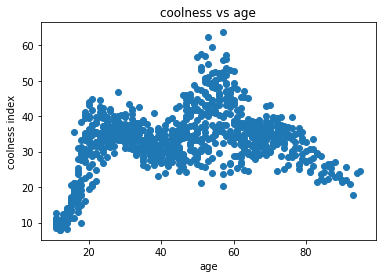

In [11]:
age = cool['age']
coolness = cool['Coolness']
age_vec = np.linspace(age.values.min(), age.values.max(), 1000)

plt.scatter(age, coolness)
plt.xlabel('age')
plt.ylabel('coolness index')
plt.title('coolness vs age')
plt.show()

## 2B)

In [12]:
age_11_22 = ((age >= 11) & (age < 22)).astype(int)
age_22_40 = ((age >= 22) & (age < 40)).astype(int)
age_40_59 = ((age >= 40) & (age < 59)).astype(int)
age_59_77 = ((age >= 59) & (age < 77)).astype(int)
age_77_95 = ((age >= 77) & (age <= 95)).astype(int)
X_step = pd.DataFrame(dict(age_11_22=age_11_22, age_22_40=age_22_40,
                           age_40_59=age_40_59, age_59_77=age_59_77,
                           age_77_95=age_77_95))


In [13]:
reg = sm.OLS(endog=coolness, exog=X_step, missing='drop')
reg_results = reg.fit()
y_pred_1 = reg_results.predict(X_step)
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:               Coolness   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 18 Feb 2018   Prob (F-statistic):          3.73e-114
Time:                        20:17:56   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_11_22     20.1025      0.562     35.746      0.0

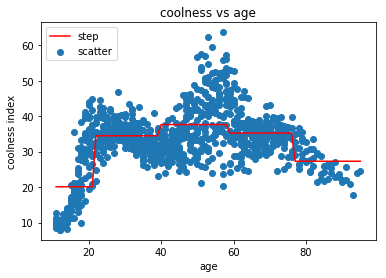

In [14]:
plt.scatter(age, coolness, label='scatter')
plt.plot(cool.age, y_pred_1, color = 'r',label='step')
plt.legend(loc='upper left')

plt.xlabel('age')
plt.ylabel('coolness index')
plt.title('coolness vs age')
plt.show()

In [15]:
b1, b2, b3, b4, b5 = reg_results.params
print('b1 =', b1, ', b2 =', b2,
      ', b3 =', b3, ', b4 =', b4,
      ', b5 =', b5)
print('Predicted Coolness of 73-year old is', reg_results.params[3])

b1 = 20.102457252090748 , b2 = 34.475788077559386 , b3 = 37.63510549244961 , b4 = 35.225400040242754 , b5 = 27.296378244321282
Predicted Coolness of 73-year old is 35.225400040242754


## 2C)

In [16]:
t = [22, 40, 59, 77]
spl_linear = LSQUnivariateSpline(age.values, coolness.values, t, k=1)
y_pred_2 = spl_linear(age)

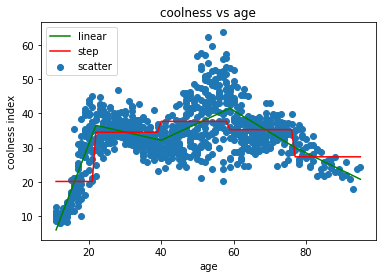

In [17]:

plt.scatter(age, coolness, label='scatter')
plt.plot(cool.age, y_pred_2, color = 'g', label='linear')
plt.plot(cool.age, y_pred_1, color = 'r',label='step')
plt.legend(loc='upper left')

plt.xlabel('age')
plt.ylabel('coolness index')
plt.title('coolness vs age')
plt.show()

In [18]:
predicted_age2 = spl_linear(73)
print('Predicted Coolness of 73-year old is', predicted_age2)

Predicted Coolness of 73-year old is 32.536832389143306


## 2D)

In [19]:

spl_cubic = LSQUnivariateSpline(age.values, coolness.values, t, k=3)
y_pred_3 = spl_cubic(cool.age)

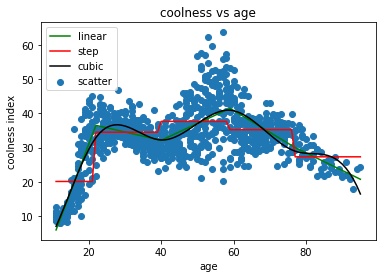

In [20]:
plt.scatter(age, coolness, label='scatter')
plt.plot(cool.age, y_pred_2, color = 'g', label='linear')
plt.plot(cool.age, y_pred_1, color = 'r',label='step')
plt.plot(cool.age, y_pred_3, color = 'black',label='cubic')
plt.legend(loc='upper left')

plt.xlabel('age')
plt.ylabel('coolness index')
plt.title('coolness vs age')
plt.show()

In [21]:
predicted_age3 = spl_cubic(73)
print('Predicted Coolness of 73-year old =', predicted_age3)

Predicted Coolness of 73-year old = 31.262429389257864
